In [85]:
# Importiere die notwendigen Bibliotheken
import pandas as pd
from tabulate import tabulate
from IPython.display import display, HTML
import pandas as pd
from tabulate import tabulate
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
# Lade die drei CSV-Dateien
csv1 = pd.read_csv('sails_results1.csv')
csv2 = pd.read_csv('sails_results2.csv')
csv3 = pd.read_csv('sails_results3.csv')
csv4 = pd.read_csv('sails_results4.csv')
csv5 = pd.read_csv('sails_results5.csv')

# Kombiniere die Dateien
combined_csv = pd.concat([csv1, csv2,csv3])

# Speichere die kombinierte Datei in einer neuen CSV
combined_csv.to_csv('sails_results.csv', index=False)

In [87]:
# 1. Lese die CSV-Datei ein
# Ersetze 'sails_results.csv' durch den Pfad zu deiner CSV-Datei
df = pd.read_csv('sails_results.csv')

sorted_df = df.sort_values(by='TotalProfit', ascending=False)
# 2. Formatiere die Tabelle mit Pandas Styling für die Anzeige in Jupyter Notebook
styled_df = sorted_df.style.format({
    'TotalProfit': '{:.0f}',   # Formatiere TotalProfit mit 2 Nachkommastellen
    'WaitingTime': '{:.0f}',   # Formatiere WaitingTime mit 2 Nachkommastellen
    'TotalTasks': '{:.0f}',   # Formatiere TotalTasks ohne Nachkommastellen
    'temp_decrease_factor': '{:.2f}'   
})

# Zeige die formatierte Tabelle in Jupyter Notebook an
display(styled_df)

# 3. Zeige die Tabelle als ASCII-Tabelle mit 'tabulate' in der Konsole an
# Diese Ausgabe sieht in der Konsole oder im Terminal gut aus
table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)

#Sortiere die Tabelle nach der Spalte 'TotalProfit' absteigend

,Instance,MainTasks,sublists_to_modify,consecutive_to_remove,start_temperature,temp_decrease_factor,maxInnerLoop,maxIterationsWithoutImprovement,TotalProfit,WaitingTime,TotalTasks,Iterations,RunTime,TimeLimit
203,7_8_1,True,2,3,1000,0.99,50,10.000000,2152,18444,925,7,412.738700,360
99,7_8_1,True,2,3,100,0.95,50,10.000000,2152,18444,925,7,409.706700,360
101,7_8_1,True,2,3,100,0.99,50,10.000000,2152,18444,925,7,413.021000,360
103,7_8_1,True,2,3,1000,0.90,50,10.000000,2152,18444,925,7,411.106200,360
105,7_8_1,True,2,3,1000,0.95,50,10.000000,2152,18444,925,7,416.049300,360
107,7_8_1,True,2,3,1000,0.99,50,10.000000,2152,18444,925,7,412.738700,360
195,7_8_1,True,2,3,100,0.95,50,10.000000,2152,18444,925,7,409.706700,360
197,7_8_1,True,2,3,100,0.99,50,10.000000,2152,18444,925,7,413.021000,360
199,7_8_1,True,2,3,1000,0.90,50,10.000000,2152,18444,925,7,411.106200,360
201,7_8_1,True,2,3,1000,0.95,50,10.000000,2152,18444,925,7,416.049300,360


In [88]:
import pandas as pd
from tabulate import tabulate

# 1. Lese die CSV-Datei ein
df = pd.read_csv('sails_results.csv')

# 2. Sortiere die Tabelle nach TotalProfit absteigend (dies hilft später für die richtige Reihenfolge)
sorted_df = df.sort_values(by='TotalProfit', ascending=False)

# 3. Für jede Kombination von 'Instance' und 'MainTask', finde alle Zeilen mit dem höchsten TotalProfit
best_per_group = sorted_df.groupby(['Instance', 'MainTasks']).apply(
    lambda x: x[x['TotalProfit'] == x['TotalProfit'].max()]
).reset_index(drop=True)

# 4. Formatiere die Tabelle für die Anzeige in Jupyter Notebook
styled_df = best_per_group.style.format({
    'TotalProfit': '{:.0f}',
    'WaitingTime': '{:.0f}',
    'TotalTasks': '{:.0f}',
    'temp_decrease_factor': '{:.2f}'
})

# Zeige die formatierte Tabelle in Jupyter Notebook an
display(styled_df)

# 5. Zeige die Tabelle als ASCII-Tabelle mit 'tabulate' in der Konsole an
table = tabulate(best_per_group, headers='keys', tablefmt='pretty', showindex=False)


/var/folders/g2/k4tsbyd10kg50jq3v4nytpy40000gn/T/ipykernel_22571/480680333.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_per_group = sorted_df.groupby(['Instance', 'MainTasks']).apply(


,Instance,MainTasks,sublists_to_modify,consecutive_to_remove,start_temperature,temp_decrease_factor,maxInnerLoop,maxIterationsWithoutImprovement,TotalProfit,WaitingTime,TotalTasks,Iterations,RunTime,TimeLimit
0,7_2_1,True,2,3,100,0.90,10,2.000000,784,4079,277,47,368.465700,360
1,7_5_1,False,2,3,100,0.90,50,10.000000,2034,4946,787,6,378.078000,360
2,7_5_1,False,2,3,100,0.99,50,10.000000,2034,4946,787,6,379.294200,360
3,7_5_1,False,2,3,100,0.90,10,2.000000,2034,4036,787,30,384.431300,360
4,7_5_1,False,2,3,1000,0.99,10,2.000000,2034,5042,787,34,385.813100,360
5,7_5_1,False,2,3,1000,0.90,10,2.000000,2034,5042,787,34,387.110500,360
6,7_5_1,False,2,3,1000,0.95,10,2.000000,2034,5042,787,34,384.990000,360
7,7_5_1,False,2,3,100,0.99,10,2.000000,2034,4066,787,30,382.172000,360
8,7_5_1,False,2,3,100,0.95,50,10.000000,2034,5303,787,7,433.394900,360
9,7_5_1,False,2,3,100,0.95,10,2.000000,2034,4036,787,30,386.010300,360


In [89]:
df = pd.read_csv('sails_results.csv')

# Round 'RunTime' to the nearest integer
df['RunTime'] = df['RunTime'].round(2).astype(int)

# Convert 'WaitingTime' to integers as it only has whole numbers
df['WaitingTime'] = df['WaitingTime'].astype(int)

# Rename specific columns
df = df.rename(columns={
    'min_temperature': 'End Temperature',
    'temp_decrease_factor': 'Decrease Factor',
    'start_temperature': 'Start Temperature',
    # Add more columns to rename as needed
})

#table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)
df.head(3)

,Instance,MainTasks,sublists_to_modify,consecutive_to_remove,Start Temperature,Decrease Factor,maxInnerLoop,maxIterationsWithoutImprovement,TotalProfit,WaitingTime,TotalTasks,Iterations,RunTime,TimeLimit
0,7_2_1,True,2,3,100,0.90,10,2.0,784,4079,277,47,368,360
1,7_2_1,True,2,3,100,0.90,50,10.0,780,3324,277,9,389,360
2,7_2_1,True,2,3,100,0.95,10,2.0,782,4225,277,50,363,360


##### Calculale RPD


In [90]:
#Find the maximum 'TotalProfit' for each 'Instance'
max_profit_per_instance_task = df.groupby(['Instance', 'MainTasks'])['TotalProfit'].transform('max')
# Calculate RPD
df['RPD'] = ((max_profit_per_instance_task - df['TotalProfit']) / max_profit_per_instance_task) * 100


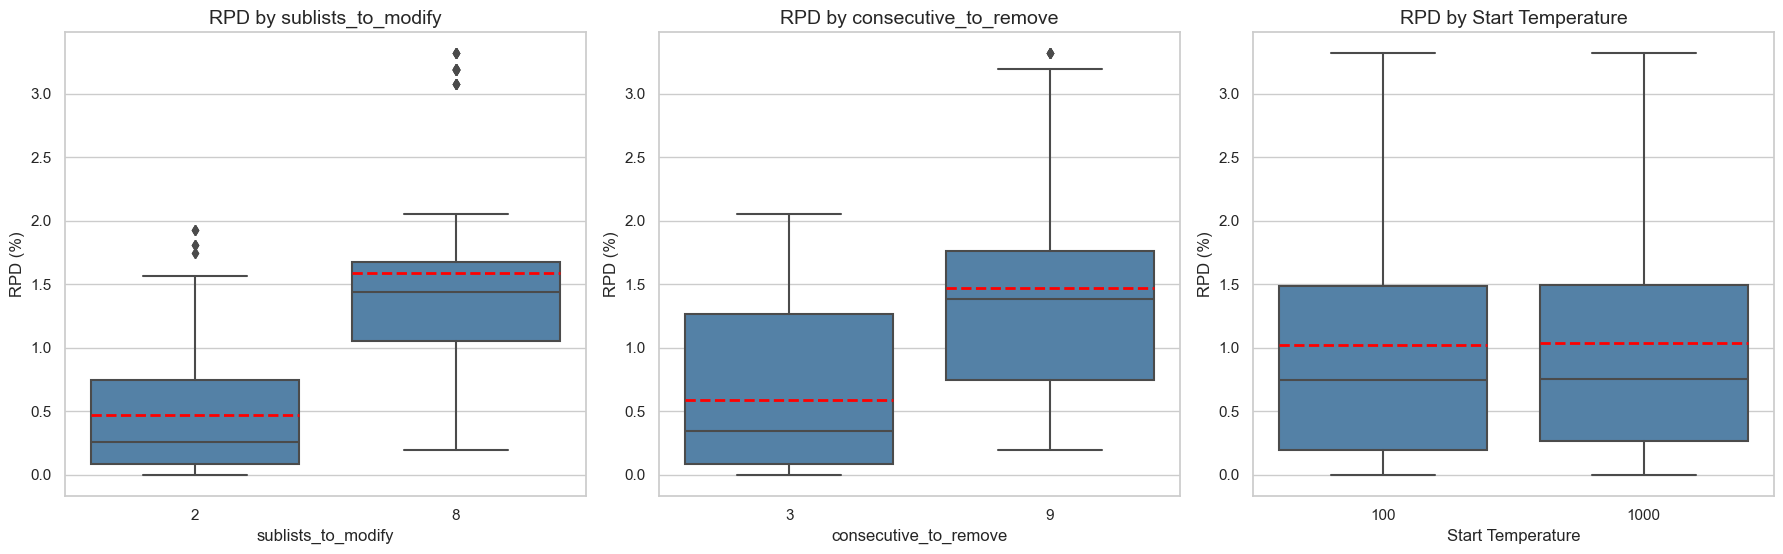

In [91]:
#Assuming 'df' is your DataFrame with the calculated RPD

# Set global plot style to serif font
plt.rcParams["font.family"] = "serif"

# Set seaborn style for whitegrid (can adjust to suit scientific purposes)
sns.set(style="whitegrid")

# Parameters to plot
parameters = ['sublists_to_modify', 'consecutive_to_remove','Start Temperature']

# Set a consistent color for all box plots
boxplot_color = "steelblue"

# Create subplots - one for each parameter
fig, axes = plt.subplots(1, len(parameters), figsize=(18, 6))

# Loop through the parameters and create boxplots in subplots
for i, param in enumerate(parameters):
    sns.boxplot(x=param, y='RPD', data=df, showmeans=True, meanline=True,
                meanprops={"color": "red", "ls": "--", "lw": 2},
                color=boxplot_color, ax=axes[i])  # Set consistent color
    
    # Set titles for each subplot
    axes[i].set_title(f'RPD by {param}', fontsize=14)
    axes[i].set_xlabel(param, fontsize=12)
    axes[i].set_ylabel('RPD (%)', fontsize=12)

# Adjust the layout to make space for the overall title
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure as a PNG file
plt.savefig('rpd_box_plots_scientific1.png', dpi=300)  # Save with high dpi for quality

# Show the plot
plt.show()

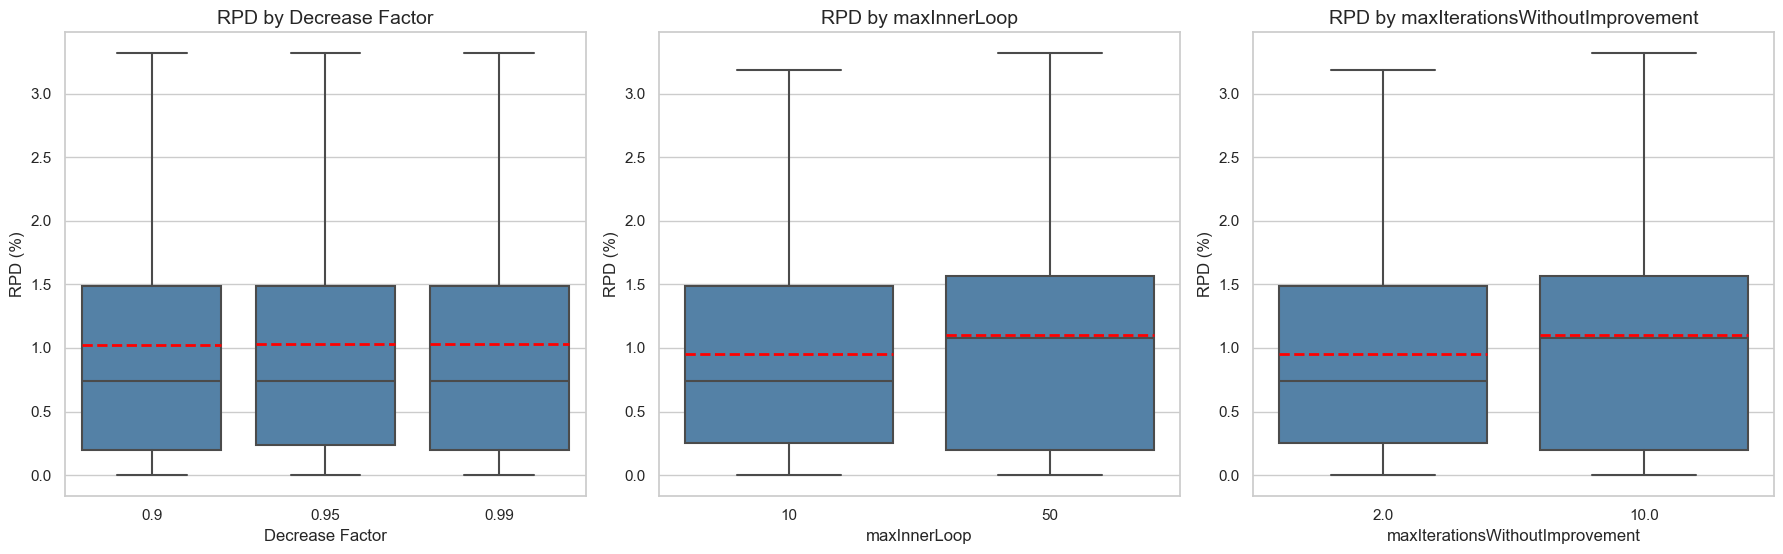

In [92]:
#Assuming 'df' is your DataFrame with the calculated RPD

# Set global plot style to serif font
plt.rcParams["font.family"] = "serif"

# Set seaborn style for whitegrid (can adjust to suit scientific purposes)
sns.set(style="whitegrid")

# Parameters to plot
parameters = ['Decrease Factor','maxInnerLoop', 'maxIterationsWithoutImprovement']

# Set a consistent color for all box plots
boxplot_color = "steelblue"

# Create subplots - one for each parameter
fig, axes = plt.subplots(1, len(parameters), figsize=(18, 6))

# Loop through the parameters and create boxplots in subplots
for i, param in enumerate(parameters):
    sns.boxplot(x=param, y='RPD', data=df, showmeans=True, meanline=True,
                meanprops={"color": "red", "ls": "--", "lw": 2},
                color=boxplot_color, ax=axes[i])  # Set consistent color
    
    # Set titles for each subplot
    axes[i].set_title(f'RPD by {param}', fontsize=14)
    axes[i].set_xlabel(param, fontsize=12)
    axes[i].set_ylabel('RPD (%)', fontsize=12)

# Adjust the layout to make space for the overall title
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure as a PNG file
plt.savefig('rpd_box_plots_scientific2.png', dpi=300)  # Save with high dpi for quality

# Show the plot
plt.show()